In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### `creating the dataset`

In [0]:

X,y = make_blobs(n_samples=30,n_features=2,centers=3,random_state=20)  ### X is the data and y are cluster labels. 

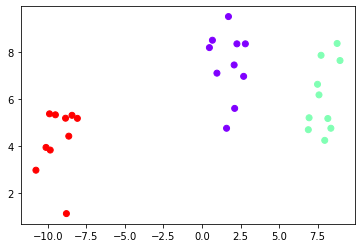

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap ='rainbow')
plt.show()

### findind distance matrix

In [0]:
class Dis(object):
  def __init__(self,x,y= None,p=2):
    self.x=x
    self.y=y
    self.p=p
  def dis(self):
    '''
    This function takes two ndarrays as x, y with same no of atributes (may not be of same size) and the parameter p the degree of minkowski distance.

    p = 2 Euclidean distance.
    p = 1 Manhattan distance
    '''
    if self.y == None:
      self.y = self.x
    distance = np.zeros((np.shape(self.x)[0],np.shape(self.y)[0]))
    for i in range(np.shape(self.x)[0]):
      for j in range(i+1):
        distance[i,j] = np.sum((np.abs(self.x[i,:]-self.y[j,:]))**self.p)**(1/self.p)
        distance[j,i] = distance[i,j]
    return(distance)


In [0]:
d = Dis(X)
dsitance_m = d.dis()

In [0]:
def finding_neighbour(i,esp=5):
  neigh = np.where(dsitance_m[i,]<esp)[0]
  return np.delete(neigh,np.where(neigh == i))


In [0]:
def core_dist(i,mpt= 5):
    if np.shape(finding_neighbour(i))[0]>= mpt:
      nei = np.sort(dsitance_m[i,finding_neighbour(i)])[:mpt]
      return np.max(nei)
    return 10000

In [0]:
def rech_dist(i,j,mpt = 5):
  if np.shape(finding_neighbour(i))[0]>= mpt:
    return max(core_dist(j),dsitance_m[i,j])
  return 10000

In [0]:
def clust(x):
  core = np.array([])
  rech = np.array([])
  for i in range(np.shape(x)[0]):
    core = np.append(core,core_dist(i))
    for j in range(np.shape(x)[0]):
      rech = np.append(rech,rech_dist(j,i))
  return core,np.reshape(rech,(np.shape(x)[0],np.shape(x)[0]))

In [0]:
core, rech = clust(X)

In [0]:
def main_calculation(x):
  core, rech = clust(x)
  status = np.zeros(np.shape(X)[0])
  cluster = np.ones(np.shape(X)[0])
  clusters = 0
  for i in range(np.shape(x)[0]):
    if status[i]==0:
      cluster[i] = clusters
      if core[i] != 10000:
        status[i]=1
        neibour = finding_neighbour(i)
        for pt in neibour:
          if core[int(pt)] != 10000 and status[int(pt)] == 0:
            cluster[int(pt)] = clusters
            status[int(pt)] = 1
            rec = rech_dist(int(i),int(pt))
            if rech[int(i),int(pt)]>rec:
              rech[int(i),int(pt)] = rec
            
            neibour1 = finding_neighbour(int(pt))
            for pt1 in neibour1:
              if core[int(pt1)] != 10000 and status[int(pt1)] == 0:
                cluster[int(pt1)] = clusters
                status[int(pt1)] = 1
                rec = rech_dist(int(pt),int(pt1))
                if rech[int(pt),int(pt1)]>rec:
                  rech[int(pt),int(pt1)] = rec
              
      clusters = clusters + 1
  return cluster

In [14]:
result = main_calculation(X)
result

array([0., 1., 0., 0., 0., 1., 0., 2., 1., 2., 0., 1., 2., 2., 0., 1., 0.,
       0., 1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 0., 1.])

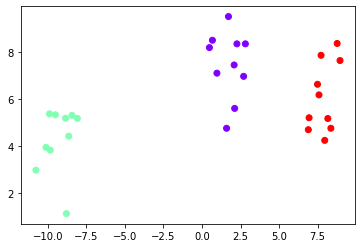

In [15]:
plt.scatter(X[:,0],X[:,1],c=result,cmap ='rainbow')
plt.show()